# Mechanical arm

In this exercise we will simulate a mechanical arm, consisting of 2 separate parts, trying to reach a target with its grip (the end of the second part). We will make use of optimization techniques discussed this morning to get the grip as close to the target as possible.

Both parts of the arm have a length of 1. The position of the arm grip can be determined by 2 angles, $\alpha$ and $\beta$, as in the figure below, where  $\alpha$ gives the angle of the first part of the arm with respect to the x-axis, and $\beta$ gives the angle of the second part of the arm with respect to the first part. The target is defined by two coordinates X and Y.

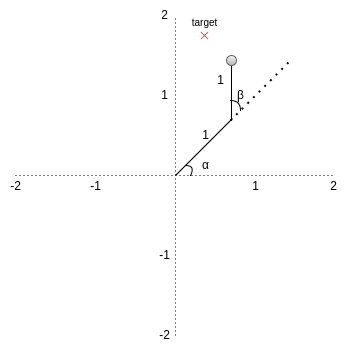

## Auxiliary functions

In [1]:
from typing import List, Tuple
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "jshtml"

In [2]:
def plot_2dsurface(alphas, betas, target=[-.25, -1], min_angle=-np.pi, max_angle=np.pi):
    alphas_plot = np.linspace(min_angle, max_angle, 200)
    betas_plot = np.linspace(min_angle, max_angle, 200)
    X, Y = np.meshgrid(alphas_plot, betas_plot)
    Z = f(X, Y, target)
    fig, ax = plt.subplots(figsize=(9, 9))

    plt.contourf(X, Y, Z, levels=150, cmap=plt.cm.plasma)
    plt.colorbar()
    if alphas and betas:
        plt.plot(alphas,betas, "-x")
    return None


def plot_3dsurface(alphas, betas, target=[-.25, -1], min_angle=-np.pi, max_angle=np.pi):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    alphas_plot = np.linspace(min_angle, max_angle, 200)
    betas_plot = np.linspace(min_angle, max_angle, 200)
    X, Y = np.meshgrid(alphas_plot, betas_plot)
    Z = f(X, Y, target)
    surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.plasma,
                           linewidth=0, antialiased=False)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    return None

In [3]:
def animate(target_X, target_Y, combo):
    alpha, beta = combo
    target = [target_X, target_Y]
    plt.cla()
    ax.set_xlim((-2,2))
    ax.set_ylim((-2,2))
    ax.set_aspect("equal")
    ax.grid()
    ax.plot([0, np.cos(alpha)], [0, np.sin(alpha)], color='b')
    ax.plot([np.cos(alpha), np.cos(alpha) + np.cos(beta + alpha)], [np.sin(alpha), np.sin(alpha) + np.sin(beta + alpha)], color='b')
    ax.scatter(np.cos(alpha) + np.cos(beta + alpha), np.sin(alpha) + np.sin(beta + alpha))
    ax.scatter(target[0], target[1], color='r', label='target')


In [4]:
def d2f_a2(a,b, target):
    cos = np.cos
    sin = np.sin
    x, y = target
    return 2*(-cos(a + b) - cos(a))*(cos(a + b) + cos(a) - x) + 2*(-sin(a + b) - sin(a))*(sin(a + b) + sin(a) - y) + 2*(-sin(a + b) - sin(a))**2 + 2*(cos(a + b) + cos(a))**2 

def d2f_b2(a,b, target):
    cos = np.cos
    sin = np.sin
    x, y = target
    return -2*cos(a + b)*(cos(a + b) + cos(a) - x) - 2*sin(a + b)*(sin(a + b) + sin(a) - y) + 2

def d2f_ab(a,b, target):
    cos = np.cos
    sin = np.sin
    x, y = target
    return -2*cos(a + b)*(cos(a + b) + cos(a) - x) - 2*sin(a + b)*(sin(a + b) + sin(a) - y) - 2*(-sin(a + b) - sin(a))*sin(a + b) + 2*cos(a + b)*(cos(a + b) + cos(a))

def get_hessian(a, b, target):
    return np.array([[d2f_a2(a,b, target), d2f_ab(a,b, target)],[d2f_ab(a,b, target),d2f_b2(a,b, target)]])



## 1) Distance to target

Write a function that represents the distance between the arm grip and the target, given the angles $\alpha$ and $\beta$ and the coordinates of the target X and Y. We will describe the angles in radians.

In [2]:
def f(alpha: float, beta: float, target_X: float, target_Y: float):
    # YOUR CODE HERE
    
    return distance

## 2) Gradient

Calculate the gradient of the function you implemented above. Assuming the target is on point (-.25, -1), calculate the gradients for the case where $\alpha$=0 and $\beta$=0. What do the gradient values mean? Do the same for the following points:

- alpha = -1, beta = -1
- alpha = -2, beta = -1
- alpha = 3, beta = 2


In [ ]:
def d_f(a: float, b: float, target_X: float, target_Y: float):    
    # YOUR CODE HERE
    
    return gradient_alpha, gradient_beta

## 3) Gradient descent

Using the derivative, we can minimize the distance between the target and the arm grip using the gradient descent method. Set the target to the point (-.25, -1) and the initial $\alpha$ = 0.5$\pi$ and $\beta$ = -0.5$\pi$. What would be the resulting angles after the first step taken with gradient descent and a learning rate of 0.1?

In [ ]:
# YOUR CODE HERE

## 4) More gradient descent

Iteratively apply more gradient descent steps until you find the minimum of the distance function. Print the gradient and the distance after each iteration, for a total of 75 iterations, to keep track of the results. Every iteration, save the current $\alpha$, $\beta$ and distance to a list.

Based on the printed values, did the distance function reach its minimum? Why?

In [ ]:
dists = []
alphas = []
betas = []

# YOUR CODE HERE

## 5) Plots

Use the cells below to plot the evolution of $\alpha$ and $\beta$ on the 2d surface, how the distance evolved over the iterations, and animate the trajectory of the robot arm. 

- Did the function converge?
- Has it found a local or a global minimum?
- What can you say about the trajectory?

In [ ]:
plot_2dsurface(alphas, betas, target=(-.25, -1), min_angle=-1.5*np.pi, max_angle=1.5*np.pi)

In [ ]:
plt.plot(dists)

In [ ]:
fig, ax = plt.subplots()
FuncAnimation(fig, partial(animate, target_X, target_Y), frames=zip(alphas, betas) , interval=500, repeat=False)

## 6) Further experiments

Test different starting points and learning rates and try to interpret the results achieved.

- Are there regions the arm can not reach? 
- What effect does the learning rate have on convergence?

## 7) Newton's method

Using the provided get_hessian function, re-write your loop to use Newton's method instead of gradient descent. Use these initial points: $\alpha$ = -1.9, $\beta$ = -1.9, target = [-1, -1] and run it for 7 iterations.

Using the plotting functions from exercise 5, what would you say is the main difference between Newton's method and gradient descent?


In [ ]:
dists = []
alphas = []
betas = []

# YOUR CODE HERE

## 8) Further experiments 2

Try some experiments with different starting angles. Can you explain what is happening? You can use the below function to interpret your results.

In [4]:
plot_3dsurface(alphas, betas, target=(-.25, -1), min_angle=-2*np.pi, max_angle=2*np.pi)

## 9) Constrained optimization

Reuse your gradient descent code from exercise 4, and try to add the following constraint: $\alpha$ can be anywhere between -2*$\pi$ and 2*$\pi$, but $\beta$ needs to be between $0.5\pi$ and $-0.5\pi$. Hint: this constraint has to be applied at every iteration.

In [ ]:
dists = []
alphas = []
betas = []

# YOUR CODE HERE